# scipy.stats - computational statistics

- T-test and ANOVA (one way)
- linear regression, curve fitting and parameter estimation
- statistical enrichment analysis (GO enrichment, fisher test)
- differential expression (error estimation on a synthetic poisson model)

### T-test

One of the basic application of statistics is testing if a null hypothesis is true. In the previous application of Pandas for gene expression studies we observed that the data was normalized, with its averages matching closely. Suppose we want to know if in statistical terms these averages are matching sufficiently close. A simple way to check this is to compute all pair t-tests and see of all our obtained P - values are falling under the 0.005 bar.

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html


          GeneID  GSM21712  GSM21713  GSM21714  GSM21715  GSM21716  GSM21718
ID                                                                          
1007_s_at    780  7.002916  7.018323  6.742437  6.725877  7.051872  6.883046
1053_at     5982  5.912374  5.905245  5.678275  5.765487  5.652194  5.845824
117_at      3310  4.623223  4.572847  4.841309  4.319575  4.489222  4.573047
121_at      7849  7.619362  7.573693  7.405601  7.552200  7.675400  7.223818
[[  0.00e+00   4.55e-06   7.28e-09   5.75e-16   2.26e-03   7.81e-06]
 [  4.55e-06   0.00e+00   2.54e-01   4.74e-04   1.33e-01   9.50e-01]
 [  7.28e-09   2.54e-01   0.00e+00   1.66e-02   7.92e-03   2.34e-01]
 [  5.75e-16   4.74e-04   1.66e-02   0.00e+00   6.26e-07   4.32e-04]
 [  2.26e-03   1.33e-01   7.92e-03   6.26e-07   0.00e+00   1.54e-01]
 [  7.81e-06   9.50e-01   2.34e-01   4.32e-04   1.54e-01   0.00e+00]]


/home/sergiun/programs/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:33: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x7fcf2ddc7390>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf2dd5ae10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf2dd60f98>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf2dd60780>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcf2ddc7da0>,
  <matplotlib.lines.Line2D at 0x7fcf2dd38d68>]}

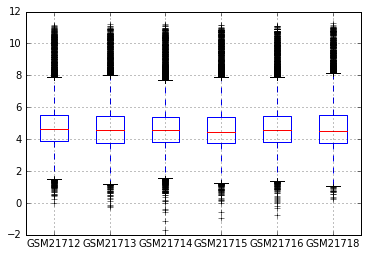

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('data/gex.txt', sep = '\t', index_col = 0)
print(df.head(4))
#df.iloc[:,1:].astype(float)
#print df.dtypes
#print type(df.GSM21712.values)

pmatrix = np.zeros((6,6))# the P-value matrix
i = -1
for ci in df.columns[1:]:
    i += 1
    a = df[ci].values
    a = a[~np.isnan(a)]#Removing undefined elements
    #a = df[ci].values.astype(float)
    #print a.dtype, type(a[0])
    j = -1
    for cj in df.columns[1:]:
        j += 1
        if ci == cj: continue
        b = df[cj].values
        b = b[~np.isnan(b)]
        t, p = stats.ttest_ind(a, b, equal_var = False)
        #print np.isnan(a).any(), np.isnan(b).any()
        pmatrix[i,j]=p

np.set_printoptions(linewidth=200)
np.set_printoptions(precision=2)
print(pmatrix)
df.boxplot()

**ANOVA**

.. But, in order not to get incidentally murdered by a reviewer with background in statistics, one should use a single test to rule them all, popularly called ANOVA.


In [45]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('data/gex.txt', sep = '\t', index_col = 0)

sl = [] #sample list
for ci in df.columns[1:]:
    a = df[ci].values
    a = a[~np.isnan(a)]#Removing undefined elements
    sl.append(a)

print stats.f_oneway(*sl)

(14.440905160749136, 3.5930324483772904e-14)


**Linear regression**

Ever felt the need to fit a straight trendline to a number of points in a scatter plot? This is called linear regression. Here is how you can do LR with numpy. As a useful exercise, let us generate our own dataset.

How is the line fitted? The most basic methodology is least square minimization of the squared standard error. One can do least square fitting directly in numpy or scikit-learn to obtain the same results.

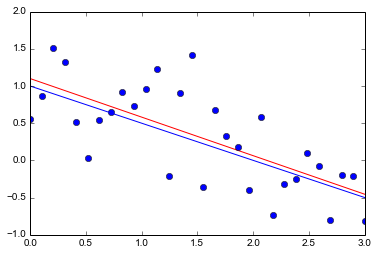

In [46]:
%matplotlib inline

import numpy as np
import pylab as plt
from scipy import stats

nsamp = 30
x = np.linspace(0, 3, nsamp)
y = -0.5*x + 1 #next line randomizes these aligned datapoints
yr = y + .5*np.random.normal(size=nsamp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,yr)
line = slope*x+intercept

plt.plot(x,line,'r-', x,yr,'o', x,y,'b-')

**Curve fitting and parameter estimation**

TODO: moved to the new optimization chapter!

When the data points are multidimensional you will use more complex multivariate regression techniques, but we will discuss that at more length in the machine learning chapter. For the moment, let us use a similar exercise as before, but fit a curve instead. While not strictly statistics related, this exercise can be useful for example if we want to decide how a probability distribution fits our data. We will use the least-square again, through the optimization module of scipy.

Optimization terminated successfully.
         Current function value: 8.982230
         Iterations: 62
         Function evaluations: 119
estimated vs real [  0.53854206  20.28753117] (1, 20)


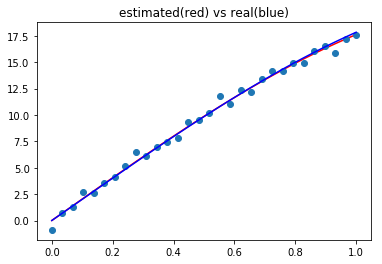

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from scipy import optimize

nsamp = 30
x = np.linspace(0,1,nsamp)
"""
y = -0.5*x**2 + 7*sin(x)
This is what we try to fit against. Suppose we know our function is generated
by this law and want to find the (-0.5, 7) parameters. Alternatively we might
not know anything about this dataset but just want to fit this curve to it.
"""

f = lambda p, x: p[0]*x*x + p[1]*np.sin(x)
#Exercise: define a normal Python function f() instead!

testp = (1, 20)
y = f(testp,x)
yr = y + .5*np.random.normal(size=nsamp)

e = lambda p, x, y: (abs((f(p,x)-y))).sum()

p0 = (5, 20) # initial parameter value

p = optimize.fmin(e, p0, args=(x,yr))
yp = f(p,x) # predicted target

print("estimated vs real", p, testp)
plt.title("estimated(red) vs real(blue)")
plt.plot(x,yp,'r-', x,yr,'o', x,y,'b-')


### Statistical enrichment analysis

**What is enrichment?**
Before we move on, we should get back to something that is always obsessing biologists with data: putting a P-value on your findings. If all you have is a series of numbers of a series of series it may be that the T-tests and ANOVA will be quite good, but what if you have cathegorical data, as many times it happens in biology? What if the question is "I have a bag of vegetables, to which of the following vegetable racks is my bag belonging more?". If the answer also takes into account how many items each of the vegetable racks is holding then you can sove it with statistical enrichment testing. Of course no one at this course will argue with your shopping habits if you don't think the number of vegies on a store racks is important! As there are many cathegorical sets of functional annotations in biology, we will only focus on [Gene Ontology](http://geneontology.org/)

**Gene Ontology**
To use the GO annotations we typically need to know if the genes/protein of a specific organism are annotated with a certain GO label (GO id), while concurrent labels are possible for every gene/protein since each can have multiple roles in biology. The annotations are structured in a tree, with the branches having inherited all annotations from the leafs. You can read more about it [here](http://en.wikipedia.org/wiki/Gene_ontology).

Extra task: Download raw annotation files and program your own Python GO module. One key aspect is annotations must be inherited through the tree. The elegant way to achieve the tree traversal is using a recursive function. This is a hard task, that needs hours to complete but it can be very instructive.

For the purpose of this course in order to parse the GO annotations we will use a Python library called [Orange](http://pythonhosted.org/Orange-Bioinformatics/index.html), that has other useful modules as well. Other alternatives are calling an R package from within Python (recomending [topGO](http://www.bioconductor.org/packages/release/bioc/html/topGO.html) for enrichment and GO.db for interogation) or if you are a Perl senior then call a BIO::Perl module. BioPython is also preparing a GO module so be sure to check their package once every couple of years.

**Enrichment test**

In the figure below you can see that there are four sets forming up when we intersect our custom set of genes with the annotation database. The purpose of the enrichment test is to tell how likely is the four sets overlap. To answer this a hypergeometric test is commonly used, known as Fischer's exact test. Let us put it into Python!

[http://en.wikipedia.org/wiki/Fisher%27s_exact_test](http://en.wikipedia.org/wiki/Fisher%27s_exact_test)

Note that multiple testing corrections like the [Bonferroni correction](http://en.wikipedia.org/wiki/Bonferroni_correction) must also be executed, but obtaining the raw P-values is sufficient for the purpose of this course.

TODO: use GOATOOLS
- https://www.nature.com/articles/s41598-018-28948-z
- https://github.com/tanghaibao/goatools


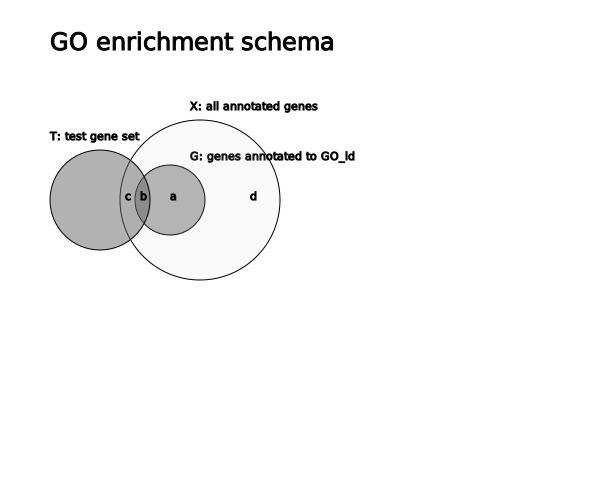

In [1]:
%run ./lib/svgoutput.py
"""
GO enrichment figure displayed using IPython's native SVG frontend
"""
scene = SVGScene(500,600)
scene.text((50,50),"GO enrichment schema")


scene.circle((170,200),35,(100,100,100), 0.5)
scene.text((190,160),"G: genes annotated to GO_id",size = 11)
scene.circle((200,200),80,(200,200,200), 0.1)
scene.text((190,110),"X: all annotated genes",size = 11)
scene.circle((100,200),50,(100,100,100), 0.5)
scene.text((50,140),"T: test gene set",size = 11)

scene.text((170,200),"a", size = 11)
scene.text((140,200),"b", size = 11)
scene.text((125,200),"c", size = 11)
scene.text((250,200),"d", size = 11)

scene

Perform the statistical test

                    In Set  Outside Set
        GOid ann.     b       a
    Not GOid ann.     c       d

Read the docs:
[http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html)


In [ ]:
"""
Using R to get the annotations and perform GO enrichment
TODO: not finished, only for reference
See here something similar:
http://bcb.io/2009/10/18/gene-ontology-analysis-with-python-and-bioconductor/
"""

import rpy2.robjects as robjects
def get_go_children(go_term, go_term_type):
    robjects.r('''
        library(GO.db)
    ''')
    child_map = robjects.r["GO%sCHILDREN" % (go_term_type)]
    children = []
    to_check = [go_term]
    while len(to_check) > 0:
        new_children = []
        for check_term in to_check:
            new_children.extend(list(robjects.r.get(check_term, child_map)))
        new_children = list(set([c for c in new_children if c]))
        children.extend(new_children)
        to_check = new_children
    children = list(set(children))
    return children

In [48]:
"""
Using Orange to get annotations
"""
from orangecontrib.bio import go
import sys

ontology = go.Ontology()
# Print names and definitions of all terms with "apoptosis" in the name
terms = [term for term in ontology.terms.values() if "apoptosis" in term.name.lower()]
annotations = go.Annotations("sgd", ontology=ontology)

go = {}
for term in ontology.terms.values():
    ants = annotations.get_all_annotations(term.id)
    gs = set([a.gene_name for a in ants])
    if len(gs)>0: go[term.id] = gs

print len(go)

7886


Now we want to choose a set of genes to test enrichment, so we output a few terms together with their annotated genes:

In [49]:
testset = set(['KAR2', 'EGD1', 'EGD2', 'YBR137W', 'MDY2', 'SEC72', 'SGT2', 'SEC66', 'SEC61', 'SEC62', 'SEC63', 'LHS1', 'SSS1', 'BTT1', 'GET3', 'GET4'])
testGO = 'GO:0006620'# posttranslational protein targeting to membrane set

import numpy as np
from scipy import stats

T = testset
X = set()
for goid in go:
    X = X | go[goid]
print "Total number of annotated genes:", len(X)

rec = []#will hold the results tupple
for goid in go:
    G = go[goid]
    a = G - T
    b = T & G
    c = (X & T) - G
    d = X - T - G
    oddsratio, pvalue = stats.fisher_exact([[len(b), len(a)], [len(c), len(d)]])
    rec.append((goid, ontology[goid].name, pvalue))

df = pd.DataFrame(rec)
df.sort(columns = 2)

Total number of annotated genes: 6380


0                                                  1  \
43    GO:0006620    posttranslational protein targeting to membrane   
3887  GO:0045047                            protein targeting to ER   
4639  GO:0072599  establishment of protein localization to endop...   
2949  GO:0070972      protein localization to endoplasmic reticulum   
3873  GO:0006612                      protein targeting to membrane   
7252  GO:0090150  establishment of protein localization to membrane   
257   GO:0072657                   protein localization to membrane   
7646  GO:0006605                                  protein targeting   
4641  GO:0072594  establishment of protein localization to organ...   
5884  GO:0044802              single-organism membrane organization   
6783  GO:0061024                              membrane organization   
5266  GO:0031204  posttranslational protein targeting to membran...   
1692  GO:0033365                  protein localization to organelle   
1518  GO:0006886                    intracellular protein transport   
398   GO:1902580              single-organism cellular localization   
1851  GO:0034613                      cellular protein localization   
1378  GO:0070727                cellular macromolecule localization   
811   GO:0016482                              cytoplasmic transport   
4945  GO:0015031                                  protein transport   
3728  GO:0045184              establishment of protein localization   
397   GO:1902582            single-organism intracellular transport   
2796  GO:0046907                            intracellular transport   
7499  GO:0008104                               protein localization   
7734  GO:0051649              establishment of localization in cell   
7050  GO:0033036                         macromolecule localization   
6762  GO:0071702                        organic substance transport   
7739  GO:0051641                              cellular localization   
4381  GO:0030867               rough endoplasmic reticulum membrane   
6806  GO:0005791                        rough endoplasmic reticulum   
6576  GO:0044765                          single-organism transport   
...          ...                                                ...   
2679  GO:0033592                      RNA strand annealing activity   
2706  GO:0034982                   mitochondrial protein processing   
2705  GO:0007039           protein catabolic process in the vacuole   
2704  GO:0007035                             vacuolar acidification   
2703  GO:0007034                                 vacuolar transport   
2702  GO:0008453           alanine-glyoxylate transaminase activity   
2701  GO:0007031                            peroxisome organization   
2700  GO:0007030                                 Golgi organization   
2699  GO:0007033                               vacuole organization   
2698  GO:0007032                              endosome organization   
2697  GO:0005868                         cytoplasmic dynein complex   
2696  GO:0005869                                   dynactin complex   
2695  GO:0016129                  phytosteroid biosynthetic process   
2694  GO:0016128                     phytosteroid metabolic process   
2693  GO:0016125                           sterol metabolic process   
2692  GO:0015138        fumarate transmembrane transporter activity   
2691  GO:0016126                        sterol biosynthetic process   
2690  GO:0001786                         phosphatidylserine binding   
2689  GO:0015168        glycerol transmembrane transporter activity   
2688  GO:0015169  glycerol-3-phosphate transmembrane transporter...   
2687  GO:0015165  pyrimidine nucleotide-sugar transmembrane tran...   
2686  GO:0071577                   zinc ion transmembrane transport   
2685  GO:0051575          5'-deoxyribose-5-phosphate lyase activity   
2684  GO:0019388                        galactose catabolic process   
2683  GO:0033048  negative regulation o

## Differential Expression

As biologists, DE is finally a statistical concept that I feel no need of explaining. But I have a personal remark: one of the most impotant concept in biological data science is also one of the leas understood. This is mainly because of the tendency to create black hole programs or function calls, that have no transparent model fitting. This is not a pythonic approach!

Here is a simple T-test application for determining the samples having a differential expression level. Suppose that the machine cannot determine very accurately the amount of reads for a given gene. We estimate the machine error using a Poisson model with set medians. We are interested in genes having a remarkably different signal in the first set of samples.

In [1]:
from scipy import stats
import numpy as np

np.random.seed(1)  # for repeatability
gex = [stats.poisson(5.0).rvs(50) for i in range(0,2000)]
E1 = stats.poisson(10.0).rvs(25)  # Poisson sampling of average 10. expression
E2 = stats.poisson(5.0).rvs(25)
gex.append(np.concatenate((E1, E2), axis = None))

X = np.stack(gex)

(2001, 50)


In [2]:
from scipy.stats.distributions import norm

C1 = list(range(0,25))
C2 = list(range(25,50))
MC1 = X[:,C1].mean(axis=1)
MC2 = X[:,C2].mean(axis=1)
VC1 = X[:,C1].var(axis=1)
VC2 = X[:,C2].var(axis=1)
nC1 = len(C1)
nC2 = len(C2)
zscores = (MC1 - MC2) / np.sqrt(VC1/nC1 + VC2/nC2)
print(zscores.mean(), zscores.std())
pvalues = 2*norm.cdf(-np.abs(zscores))

0.00622344443007202 1.0716695216285186


Task:
- Apply a false discovery rate correction using statsmodels, using the [documentation][1]. Show how the p-values, false discovery rates and zscores are related.
- Apply another statistical test for differential expression. For example [Mann-Whitney][2].

[1]: http://www.statsmodels.org/stable/
[2]: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

Further reading:
- [diffxp][1]: A package to perform DE and gene set analysis in single cell datasets via Python. Part of [scanpy][2].

[1]: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
[2]: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1382-0